<a href="https://colab.research.google.com/github/Manlikemurph/monkeys/blob/master/Flour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai import *
from fastai.vision import *
from fastai.core import *

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = '/content/drive/My Drive/fastai/Flour'

In [4]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  2 classes:
 ['adulterated', 'non-adulterated']


In [0]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

In [6]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 127 training images and 31 validation images.


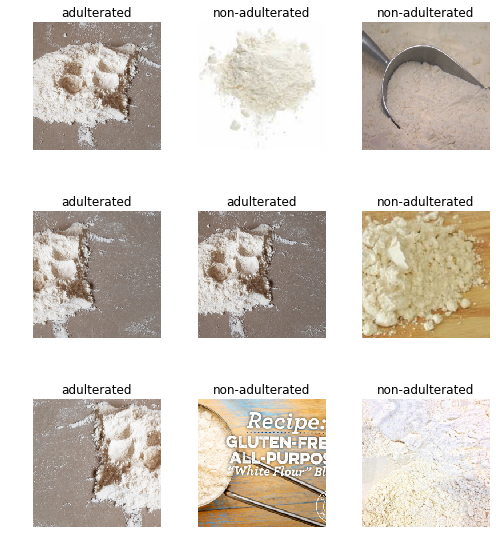

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 40957191.58it/s]


In [9]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.809527,0.850942,0.580645,00:14
1,0.943389,0.335840,0.838710,00:14
2,0.762131,0.122132,1.000000,00:12


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

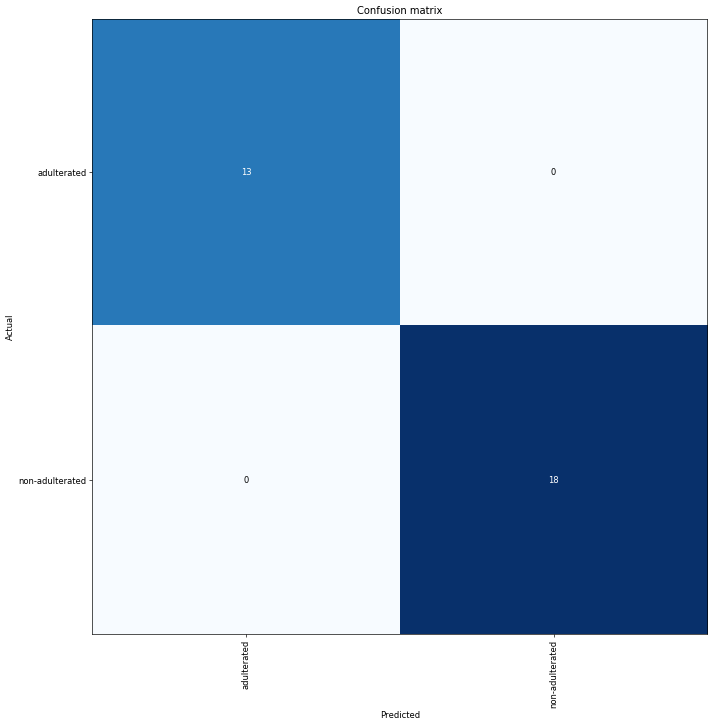

In [11]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

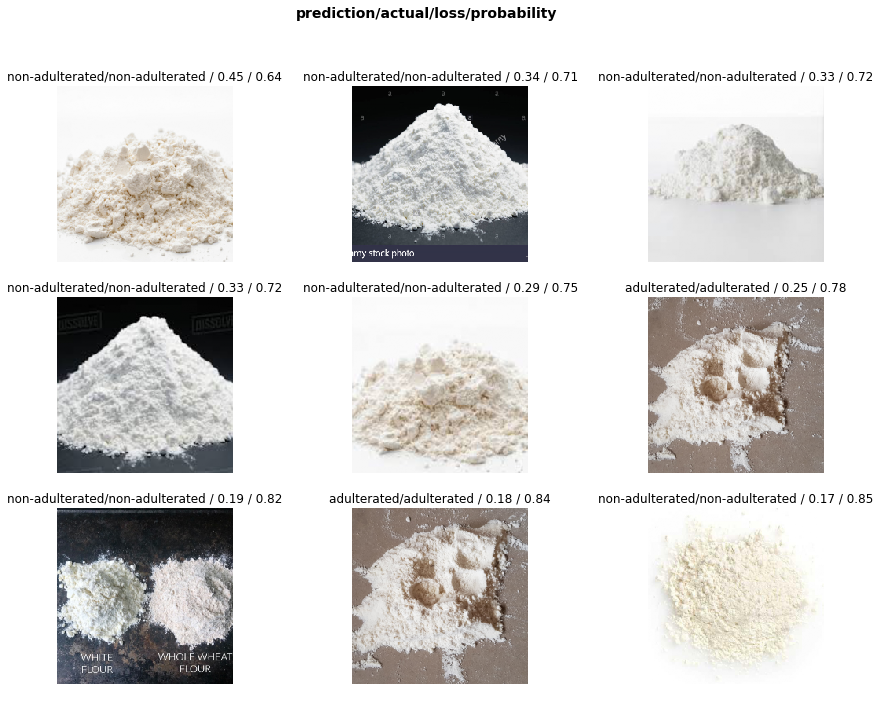

In [12]:

interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

In [20]:
filename = '/content/drive/My Drive/fastai/Test/flour.jpg'
img = open_image(filename)
img

FileNotFoundError: ignored

In [18]:
pred_class,pred_idx,outputs = learn.predict(img)
print("It is ", pred_class)

It is  non-adulterated
